In [50]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [51]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents to /content
zip_ref.extractall('/content')

# Close the zip file
zip_ref.close()

In [53]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [54]:
#GENARATORS
# TRAINING DATASET - 80%
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",  # CAT=0, DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,     # 625 x 32 = 20000
    image_size=(256, 256),
    shuffle=True,
   seed=42          #  set seed for reproducibility

)

Found 20000 files belonging to 2 classes.


In [55]:
# VALIDATION DATASET - 20%
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",  # CAT=0, DOG=1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=42              #  must match train_ds seed

)

Found 5000 files belonging to 2 classes.


In [56]:
#now the imagaes are stored in the fashion of numpy array from 0-255

In [57]:
# normalize it
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image , label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [58]:
#create a CNN model with three CONVO layers
model=Sequential()
# layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
# Flatten
model.add(Flatten())
#fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #final output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [62]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=10,callbacks=[early_stopping]) #callbacks=[early_stopping]

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.5547 - loss: 2.8589 - val_accuracy: 0.6378 - val_loss: 0.6248
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6421 - loss: 0.6441 - val_accuracy: 0.7128 - val_loss: 0.5642
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.7457 - loss: 0.5235 - val_accuracy: 0.7624 - val_loss: 0.5138
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7900 - loss: 0.4572 - val_accuracy: 0.7476 - val_loss: 0.5054
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8217 - loss: 0.4016 - val_accuracy: 0.7330 - val_loss: 0.5038
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8577 - loss: 0.3369 - val_accuracy: 0.7672 - val_loss: 0.5551
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8905 - loss: 0.2676 - val_accuracy: 0.8030 - val_loss: 0.4764
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9233 - loss: 0.1951 - 

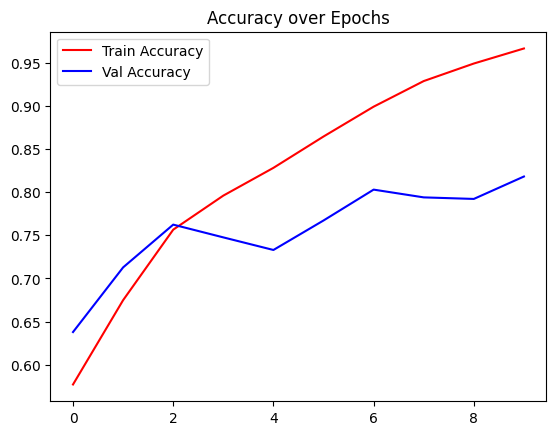

In [84]:
# PLOT ACCURACY
# ========================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


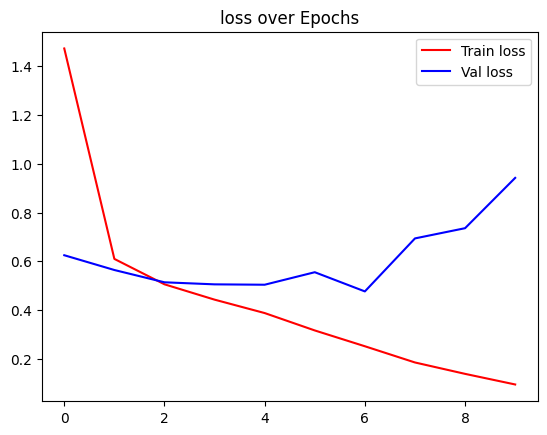

In [64]:
# PLOT LOSS
# ========================

plt.plot(history.history['loss'], label='Train loss', color='red')
plt.plot(history.history['val_loss'], label='Val loss', color='blue')
plt.legend()
plt.title("loss over Epochs")
plt.show()

In [65]:
#testtimonials

In [66]:
import cv2

In [67]:
test_img=cv2.imread('/content/dog.jpg')

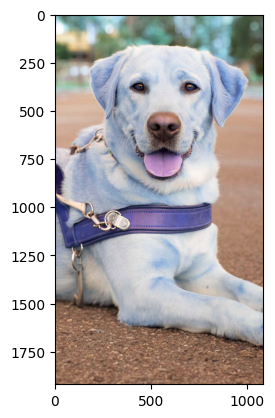

In [68]:
plt.imshow(test_img)

In [69]:
test_img.shape

(1920, 1080, 3)

In [70]:
test_img=cv2.resize(test_img,(256,256))

In [71]:
test_input=test_img.reshape((1,256,256,3)) #bcs we pass in batches and we have only one img to pass so the first arg is 1

In [72]:
y_pred=model.predict(test_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


array([[1.]], dtype=float32)

In [73]:
if y_pred[0][0]==1:
  print("Dog")
else:
  print("Cat")

Dog


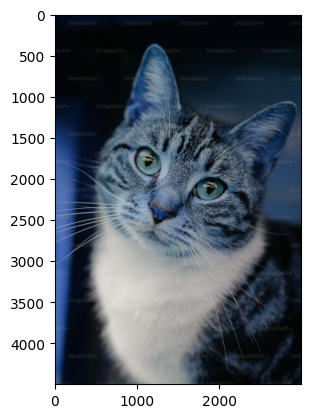

In [74]:
test_img_2=cv2.imread('/content/cat.jpeg')
plt.imshow(test_img_2)

In [75]:
test_img_2.shape

(4499, 3000, 3)

In [76]:
test_img_2=cv2.resize(test_img_2,(256,256))
test_input_2=test_img_2.reshape((1,256,256,3))
y_pred=model.predict(test_input_2)
y_pred



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.]], dtype=float32)

In [77]:
if y_pred[0][0]==1:
  print("Dog")
else:
  print("Cat")

Cat


In [78]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Get true labels and images from validation set
y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds >= 0.5).astype(int).flatten()

    y_pred.extend(preds)
    y_true.extend(labels.numpy().flatten())

# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn):{ acc*100}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

In [79]:
# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn):{acc*100}%")

Validation Accuracy (sklearn):80.30000000000001%


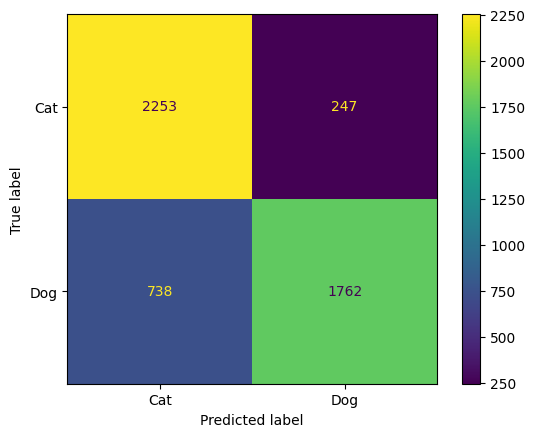

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()
